<a href="https://colab.research.google.com/github/kevinmcaleer/ik/blob/main/IK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inverse Kinematics
*An example of how to calculate Inverse Kinmatics for an arm with 2 degrees of Freedom*

Kevin McAleer, 18 September 2021

---



## Using Python / MicroPython

This code accompanies the YouTube video - <https://youtu.be/nW5FUVzYCKM>


$$ SOHCAHTOA \ \ \textstyle sin \ x = \frac {o}{h}, \ cos \ x = \frac {a}{h}, \ and \ tan \ x = \frac {o}{a} $$

### Import Libraries
Import the maths functions we need

In [33]:
from math import sqrt, pi, acos, cos, tan, atan2, sin

### Constants
Lets set some Constants

In [34]:
L1 = 55.1
L2 = 35
L3 = 13.2
L4 = 45

x = -1.15 
y = 30.14

O1X = 25
O1Y = 24
O2X = 49
O2Y = 24

# if values are negative multiple by -1 to get a positive number
if x <0:
  x = x * -1
if y <0:
  y = y * -1

### Translate to Global Coordinates

In [35]:
# Lets translate the X and Y coordinates to the same frame of reference as the servos
global_x = x + O1X # O1X
global_y = y + O1Y # O1Y

In [36]:
def triangle1(x,y)->float:
  """ returns the value of the hypoteneuse """
  
  return sqrt(x**2 + y**2)


In [37]:
def triangle2(x:float, y:float, r:float)->float:
  """ Finds the value of angle Alpha"""
  alpha = acos((L1**2 + L2**2 - r**2) / (2*L1*L2))
 
  return pi - alpha # Radians

In [38]:
def triangle3(q2:float)->float:
  """ Returns the value of a2_sin_q2 """
  a2_sin_q2 = sqrt(- cos(q2**2))
  
  return a2_sin_q2 # Radians

In [39]:
def triangle4(q2)->float:
  """ Returns the angle Beta """
  beta = atan2(L2*sin(q2),L1+L2*cos(q2))

  return beta # Radians

### Time to Print
Lets run the functions and solve the triangles

In [47]:
# Lets print out the values

r = triangle1(global_x, global_y)
print("Triangle 1, r =",r,"mm")
q2 = round(triangle2(global_x, global_y, r),1)
print("Triangle 2, q2 =",q2, "Radians")
q2_degrees = round(q2 * (180/pi),1)
print("Triangle 2, q2 = ",q2_degrees,"° degrees",sep="")

alpha = round(triangle3(q2), 1)
beta = round(triangle4(q2), 1)
gamma = round(atan2(y,x),1)

alpha_in_degrees = round(alpha * (180/pi), 1)
beta_in_degrees = round(beta * (180/pi), 1)
gamma_in_degrees = round(gamma * (180/pi),1)

print("alpha =", alpha_in_degrees, "°, beta =", beta_in_degrees, "°, gamma =", gamma_in_degrees,"°", sep="")
q1 = beta - gamma
print("q1:", q1, "degrees")


Triangle 1, r = 60.124554884007246 mm
Triangle 2, q2 = 1.7 Radians
Triangle 2, q2 = 97.4° degrees
alpha =57.3°, beta =34.4°, gamma =85.9°
q1: -0.9 degrees


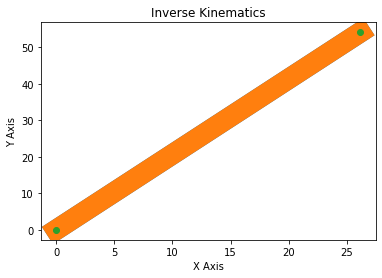

In [69]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.array([0, global_x])
y1 = np.array([0, global_y])
x2 = np.array([global_x, 0])
y2 = np.array([global_y, 0])

xpoints = np.array([0, global_x])
ypoints = np.array([0, global_y])

# plt.plot(x1, y1)

plt.plot(x1,y1,x2, y2, linewidth = '20.5')
plt.plot(xpoints, ypoints, 'o')

plt.title("Inverse Kinematics")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

plt.show()